In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (3, 2)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 10  # Default font size
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_continuous_vs_discrete_noavgpopdrift'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [5]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# pf_params_all = prepped_data_agg['pf_params_all']
# all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [7]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# prep session

preprocessing: center and normalize each neuron's ratemap; for normalization, scale by the max between the neuron's std and 0.1 of the max std. This way roughly the neurons with the top 45% of the variance get to have std 1 after normalization. This way the data won't be heavily biased by noise coming from neurons with too low firing rate. 
Since there are way more features (n_neuron x n_position_bin) than samples (n_trial), we can use PCA is used to drasitically reduce the number of features without lossing information. We keep the components that together explain just above 95% of the variance and discard the rest.

In [38]:
# ani,sess=subdb.iloc[0][['animal_name.1','sess_name']]

# ti=0,
# tt=0
# fr_map_trial_df_onett=fr_map_trial_df_all.loc[(ani,sess)].loc[(ti,tt),:].droplevel((0,1))
# # fr_map_trial_df_onett=fr_map_trial_df_all.loc[(ani,sess)].loc[(ti,tt),:]
# xx=prep_one_sess(fr_map_trial_df_onett)
# signal = prep_one_sess(fr_map_trial_df_onett)

0.9878613691041032


In [9]:
import step_vs_gradual_analysis_population as svgap
reload(svgap)

<module 'step_vs_gradual_analysis_population' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis_population.py'>

In [43]:
signal = svgap.prep_one_sess(fr_map_trial_df_onett)

0.9878613691041032


# fit data + model comparison

### fit change point model and get r2

In [39]:
import ruptures as rpt
def fit_cpd_get_r2_multi_d(signal,ncpts, model_type='dyn',cost='l2',min_size=2,jump=1):
    '''
    assuming l2
    '''
    if model_type=='dyn':
        model = rpt.Dynp(model=cost,jump=jump,min_size=min_size)
    c=model.fit(signal)
    cpts = model.predict(ncpts)
    n_trial = signal.shape[0]
    err=c.cost.sum_of_costs(list(cpts))
    err_div_trial=err / n_trial
    sum_of_var = np.var(signal,axis=0).sum()
    r2=(sum_of_var - err_div_trial) / sum_of_var

    return cpts, r2


In [51]:
import statsmodels.api as sm
def fit_poly_regress_get_r2(xx,order=1,cost='l2',verbose=True):
    if cost=='l2':
        xs_l = []
        for o in range(1,order+1):
            xs = np.arange(len(xx)) ** o 
            xs_l.append(xs)
        xs_l = np.array(xs_l).T
#         pdb.set_trace()
        xs_l = sm.add_constant(xs_l)
        model = sm.OLS(xx,xs_l)
        results = model.fit()
        if verbose:
            print(results.summary())
        xx_pred=results.predict()
        exp_var=np.var(xx_pred)
        data_var = np.var(xx)
        r2 = results.rsquared
        return r2,xx_pred,exp_var,data_var
            
    else:
        print('not implemented')
        pass

def fit_poly_regress_get_r2_multi_d(signal,order=1):
    '''
    signal: n_sample (i.e. n_trial) x n_feature
    '''
    exp_var_all = []
    data_var_all = []
    xx_pred_all = []
    for ii in range(signal.shape[1]):
        r2,xx_pred,exp_var,data_var = fit_poly_regress_get_r2(signal[:,ii],order=order,verbose=False)
        exp_var_all.append(exp_var)
        data_var_all.append(data_var)
        xx_pred_all.append(xx_pred)
    r2 = np.sum(exp_var_all) / np.sum(data_var_all)
    xx_pred_all = np.array(xx_pred_all).T
    return r2,xx_pred_all




### sweep through

In [63]:
order = 1

In [10]:
# prep data all
reload(svgap)
gpb = fr_map_trial_df_all.groupby(level=(0,1,2,3),sort=False)
signal_all = {}
for k,val in gpb:
    fr_map_trial_df_onett = val.loc[k].dropna(axis=1,how='all')
    signal = svgap.prep_one_sess(fr_map_trial_df_onett)
    signal_all[k] = signal
# signal_all = pd.concat(signal_all,axis=0)

0.9597625759895652
0.9587050937398117
0.9528183067134929
0.9557412878764502
0.9662578672753094
1.0
0.9624675374898326
0.9574518373904464
0.9724324394665443
0.9999999999999999
0.9759324508272817
0.9597856755723435
0.9664024025541135
0.9750019442060022
0.9507815961037396
0.9524616748092857
0.9631701852844656
0.9724083820578997
0.9581738464379365
0.9561736431780803
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
0.972088165976192
0.9693508994406916
0.9647948801331179
0.9573481102535253
0.9711893702248284
0.9503362959020927
0.9733763176128654
1.0
1.0
1.0000000000000002
0.9512589954787041
0.9555227362148797
0.962456590573221
0.9517163091555234
0.9524317203361973
0.9562833189856111
0.9629485535600184
0.9638744295919429
0.9637739353214413
0.9601008390220297
0.9999999999999999
1.0
0.9605941142502404
0.9670935187614157
0.9999999999999999
0.9664352361189026
1.0
0.9530522069369698
0.9999999999999999
1.0
0.9999999999999998
0.9530916014010157
0.9999999999999998
0.9610718802149057
1.0
0.96

In [ ]:
# next add in loop order

In [31]:
%%time
reload(svgap)
r2_df_d_all = svgap.fit_cpd_poly_regress_multi_order_all(signal_all,order_l=[1,2,3])


CPU times: user 2.03 s, sys: 0 ns, total: 2.03 s
Wall time: 2.04 s


N = 108; Effect size = -0.11442559626238673; wilcoxon p=0.0061969886093609025
N = 106; Effect size = -0.19134635206163456; wilcoxon p=0.010439830637135545
N = 104; Effect size = -0.2440644709806308; wilcoxon p=0.0005666298009433705


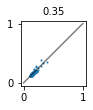

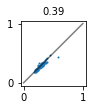

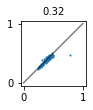

In [32]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
for ii,order in enumerate(r2_df_d_all.columns.get_level_values(0).unique()):
#     fig,ax=plt.subplots(figsize=(3,3))
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_d_all.loc[:,(order,'reg')],r2_df_d_all.loc[:,(order,'step')],s=1,marker='o')
    
    xx=r2_df_d_all.loc[:,(order,'step_minus_reg')].dropna()
    misc.print_stats_onevar(xx)
    
    frac_step_larger=(xx > 0).mean()
    ax.plot([0,1],[0,1],c='k',alpha=0.5)
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
    # to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
#     ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'population_pc_state_scatter_R2_cpd_vs_polyreg_order{order}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# example sessions PCA

In [12]:
ti=0
tt=0
ani_sess_l =[]
for i in range(3):
    row=subdb.iloc[i]
    ani_sess_l.append((row['animal_name.1'],row['sess_name'],ti,tt)) 

In [14]:
for k in ani_sess_l:
    r2_df_d_all.loc[k]

1  step              0.161273
   reg               0.170462
   step_minus_reg   -0.009189
2  step              0.259780
   reg               0.266829
   step_minus_reg   -0.007049
3  step              0.338619
   reg               0.340633
   step_minus_reg   -0.002014
Name: (e15_13f1, e15_13f1_220118, 0, 0.0), dtype: float64

In [23]:
from sklearn.decomposition import PCA
def plot_pc_one(signal,fig=None,ax=None):
    pca = PCA(n_components=2)
    signal_reduced = pca.fit_transform(signal)
    data=signal_reduced
    n_trial =data.shape[0]
    
    if ax is None:
        fig,ax=plt.subplots()
    cmap = plt.cm.Spectral
    norm = plt.Normalize(vmin=0, vmax=n_trial)

    for i in range(n_trial-1):
        ax.plot(data[i:i+2, 0], data[i:i+2, 1], linestyle=':', marker='o',ms=3, color=cmap(norm(i)))
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    # Adding a colorbar
    cm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cm.set_array([])
    fig.colorbar(cm, ticks=np.arange(0, n_trial+1, 3),ax=ax)

    return fig,ax


In [18]:
row = r2_df_d_all.loc[k,3]

In [19]:
row

step              0.338619
reg               0.340633
step_minus_reg   -0.002014
Name: (e15_13f1, e15_13f1_220118, 0, 0.0), dtype: float64

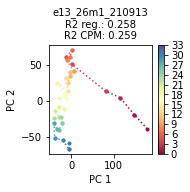

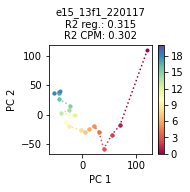

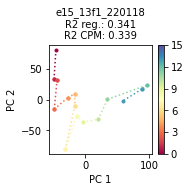

In [27]:
# fig,axs=plt.subplots(3,1,figsize=(3,9))
dosave=True
order = 3
for ii,k in enumerate(ani_sess_l):
    fig,ax=plt.subplots(figsize=(2.3,2))

    signal = signal_all[k] 
    fig,ax = plot_pc_one(signal,fig=fig,ax=ax)
    row = r2_df_d_all.loc[k,order] # order 3!! change according to order used in individual PC visualization
    ax.set_title(f'{k[1]}\nR2 reg.: {row.loc["reg"]:.03f}\nR2 CPM: {row.loc["step"]:.03f}')
    if dosave:
        figfn = f'pv_pc_{k}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)
    

# example fit of the PCs

In [ ]:
def get_

In [100]:
def fit_plot_first_n_pc(signal,n_pc=3,order=3,fig=None,axs=None):
    if axs is None:
        fig,axs=plt.subplots(1,n_pc,figsize=(2*n_pc,2))
    for i in range(n_pc):
        ax=axs[i]
        xx=signal[:,i]
        r2_reg,xx_pred_reg,exp_var,data_var = svgap.fit_poly_regress_get_r2(xx,order=order,cost='l2',verbose=False)
        cpts, r2 = svgap.fit_cpd_get_r2_multi_d(signal,order)
        cpts = np.insert(cpts,0,0)
        xx_pred_step = cpa.predict_from_cpts(xx,cpts)
        r2_step = np.var(xx_pred_step) / np.var(xx)
        if ax is None:
            fig,ax=plt.subplots()
        ax.plot(xx,marker='o',label='raw',c='grey',ms=3)
        ax.plot(xx_pred_reg,label='fitted regression',c='C1')
        ax.plot(xx_pred_step,label='fitted CPM',c='C0')
        ax.set_title(f'PC {i}\nR2 reg.: {r2_reg:.02f}\nR2 CPM: {r2_step:.02f}')
        ax.set_xlabel('Trial')
        sns.despine()
    ax.legend(bbox_to_anchor=[1.05,1],frameon=False)
    plt.tight_layout()
    return fig,axs
    
    
    
    

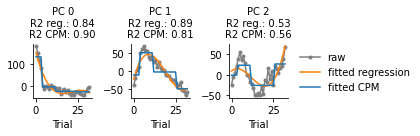

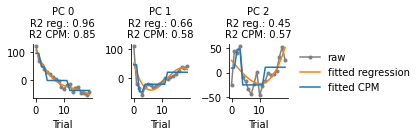

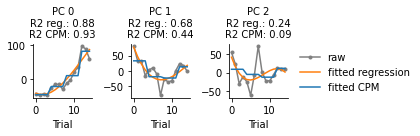

In [104]:
# fig,axs=plt.subplots(3,1,figsize=(3,9))
dosave=True
for ii,k in enumerate(ani_sess_l):
    signal = signal_all[k]
    fig,axs=fit_plot_first_n_pc(signal)
    if dosave:
        figfn = f'pv_pc_reg_step_fit_{k}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)
    

(<Figure size 432x144 with 3 Axes>,
 array([<Axes: title={'center': 'PC 0\nR2 reg.: 0.88\nR2 CPM: 0.93'}, xlabel='Trial'>,
        <Axes: title={'center': 'PC 1\nR2 reg.: 0.68\nR2 CPM: 0.44'}, xlabel='Trial'>,
        <Axes: title={'center': 'PC 2\nR2 reg.: 0.24\nR2 CPM: 0.09'}, xlabel='Trial'>],
       dtype=object))

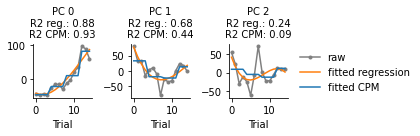

In [ ]:
# fig,axs=plt.subplots(3,1,figsize=(3,9))
# dosave=True
for ii,k in enumerate(ani_sess_l):
    fig,ax=plt.subplots(figsize=(2.3,2))

    signal = signal_all[k]
#     fig,ax = plot_pc_one(signal,fig=fig,ax=ax)
    ax.set_title(k[1])
#     if dosave:
#         figfn = f'pv_pc_{k}'
#         ph.save_given_name(fig,figfn,figdir,dpi=900)
    

In [ ]:
pca = PCA(n_components=2)
# pca = umap.UMAP(n_components=2,n_neighbors=4)
signal_reduced = pca.fit_transform(signal)
n_trial =signal.shape[0]
data =signal_reduced

fig,ax=plt.subplots()
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=n_trial)

for i in range(n_trial-1):
    ax.plot(data[i:i+2, 0], data[i:i+2, 1], linestyle=':', marker='o', color=cmap(norm(i)))

# Adding a colorbar
cm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cm.set_array([])
plt.colorbar(cm, ticks=np.arange(0, n_trial+1, 2))


# ax.plot(signal_reduced[:,0],signal_reduced[:,1],marker='o',linestyle=':')

In [ ]:
signal_all

In [27]:
reload(misc)

<module 'misc' from '/mnt/home/szheng/projects/util_code/misc.py'>

In [23]:

efsz = xx.mean()/xx.std()
_,pval=scipy.stats.wilcoxon(xx)
print(f'N = {xx.shape[0]}; Effect size = {efsz}; wilxocon p={pval}')


-0.2440644709806308

In [59]:
r2,xx_pred_all = fit_poly_regress_get_r2_multi_d(signal,order=3)

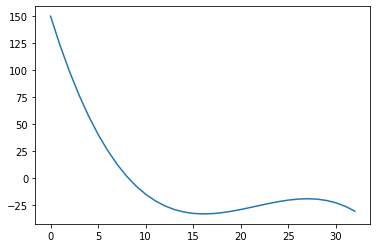

In [61]:
plt.plot(xx_pred_all[:,0])